<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-version" data-toc-modified-id="Check-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check version</a></span></li><li><span><a href="#Install-packages-when-first-use" data-toc-modified-id="Install-packages-when-first-use-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install packages when first use</a></span></li><li><span><a href="#Use-packages" data-toc-modified-id="Use-packages-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Use packages</a></span></li><li><span><a href="#Reproducibility" data-toc-modified-id="Reproducibility-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reproducibility</a></span></li><li><span><a href="#Load-and-filter-missing-value-of-the-definition-file" data-toc-modified-id="Load-and-filter-missing-value-of-the-definition-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load and filter missing value of the definition file</a></span></li><li><span><a href="#Read-in-plink-format-genotype-files" data-toc-modified-id="Read-in-plink-format-genotype-files-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read in plink format genotype files</a></span></li><li><span><a href="#Trait-Simulation" data-toc-modified-id="Trait-Simulation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trait Simulation</a></span><ul class="toc-item"><li><span><a href="#Generalized-Linear-Model" data-toc-modified-id="Generalized-Linear-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Generalized Linear Model</a></span></li></ul></li><li><span><a href="#Extract-phenotype-and-covariates" data-toc-modified-id="Extract-phenotype-and-covariates-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extract phenotype and covariates</a></span></li><li><span><a href="#Loop-over-genes" data-toc-modified-id="Loop-over-genes-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Loop over genes</a></span></li><li><span><a href="#Output-results" data-toc-modified-id="Output-results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Output results</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#eRLRT" data-toc-modified-id="eRLRT-10.0.1"><span class="toc-item-num">10.0.1&nbsp;&nbsp;</span>eRLRT</a></span></li><li><span><a href="#eLRT" data-toc-modified-id="eLRT-10.0.2"><span class="toc-item-num">10.0.2&nbsp;&nbsp;</span>eLRT</a></span></li><li><span><a href="#eScore" data-toc-modified-id="eScore-10.0.3"><span class="toc-item-num">10.0.3&nbsp;&nbsp;</span>eScore</a></span></li></ul></li></ul></li></ul></div>

# New variance component test for SNP set analysis

Based on the oringinal tutorial, this one changes a new dataset for SNP 24 and focuses on genes with 3 or more SNPs. 

## Check version 

This tutorial has been checked with Julia version 1.4.1

In [73]:
versioninfo()

Julia Version 1.4.1
Commit 381693d3df* (2020-04-14 17:20 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)


## Install packages when first use

Note: For this tutorial, you need to have the statistial software R and R pakage "pracma" installed.

Here we activate the project environment in the current working directory and list packages that is local to this tutorial.

In [74]:
using Pkg
Pkg.activate()
Pkg.status()

 Activating environment at `~/Box Sync/workspace/Tutorials/VCTest/VCTestnewtutorialfiles/Project.toml`


Status `~/Box Sync/workspace/Tutorials/VCTest/VCTestnewtutorialfiles/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.4
  [31c24e10] Distributions v0.23.5
  [38e38edf] GLM v1.3.9
  [7ab2ea78] MendelPlots v0.1.3 #master (https://github.com/OpenMendel/MendelPlots.jl.git)
  [b51826c6] OrdinalMultinomialModels v0.3.3 #master (https://github.com/OpenMendel/OrdinalMultinomialModels.jl)
  [1a8c2f83] Query v0.12.2
  [4e780e97] SnpArrays v0.3.2 #master (https://github.com/OpenMendel/SnpArrays.jl)
  [2913bbd2] StatsBase v0.33.0
  [3eaba693] StatsModels v0.6.12
  [dec3038e] TraitSimulation v0.1.0 #master (https://github.com/OpenMendel/TraitSimulation.jl)
  [813005db] VarianceComponentModels v0.1.0 #master (https://github.com/OpenMendel/VarianceComponentModels.jl.git)
  [1b8b39c6] VarianceComponentTest v0.1.0 #master (https://github.com/jinjinzhou/VarianceComponentTest.jl.git)
  [8bb1440f] DelimitedFiles 
  [37e2e46d] LinearAlgebra 
  [9a3f8284] Random 


You can install OpenMendel packages using the following command: 

In [75]:
# using Pkg
# Pkg.add(PackageSpec(url="https://github.com/OpenMendel/SnpArrays.jl.git"))
# Pkg.add(PackageSpec(url="https://github.com/OpenMendel/MendelPlots.jl.git"))
# Pkg.add(PackageSpec(url="https://github.com/OpenMendel/TraitSimulation.jl"))
# Pkg.add(PackageSpec(url="https://github.com/jinjinzhou/VarianceComponentTest.jl.git"))

## Use packages

In [76]:
using SnpArrays
using CSV
using DataFrames, Query
using Distributions, DelimitedFiles, LinearAlgebra
using VarianceComponentTest
using StatsModels, Random, StatsBase, TraitSimulation
using Random
using GLM 

## Reproducibility

We set a random seed using the Random.jl package for reproducibility. If you wish to end up with different data, you will need to comment out these commands or use another value in Random.seed!().

In [77]:
Random.seed!(100);

## Load and filter missing value of the definition file

The gene annotation is contained in the definition file in the last (sixth) column. This data is from Option 24 of the Mendel data.

In [78]:
df= (CSV.read("SNP_def24a.in", header=false))[:, [1, 2, 3, 6]]
chromosomes = df[:, 2]
AdjBasepairs = df[:, 3]
genes = df[:, end];

Set missing value as -1 and count the number of unique genes because we are only interested in genes with 3 or more snps.

In [79]:
genes[ismissing.(genes)] .= -1 # missing value as -1
chromosomes[ismissing.(genes)] .= -1
uniquegenes = unique(genes)
genes_number = length(uniquegenes)

4824

## Read in plink format genotype files

Read three files containing information about the names of snps, locations and phenotype messages. 

In [80]:
plinkFile = "SNP_24"
## parse data from files
plinkBedfile = string(plinkFile, ".bed");
plinkBimfile = string(plinkFile, ".bim");
plinkFamfile = string(plinkFile, ".fam");
SNP_24 = SnpData("SNP_24");

In [81]:
# BIM file: chr, rs#, morgan, bp position, allele1, allele2
bimdata = readdlm(plinkBimfile, String);
chrID = bimdata[:, 1];
snpID = bimdata[:, 2];
snpPos = bimdata[:, 4];
nSNP = length(snpID);

In [82]:
# FAM file: fam ID, ind ID, father ID, mother ID, sex, phenotype
famdata = readdlm(plinkFamfile)
nPer = length(famdata[:, 1])
Fam_Person_id = DataFrame(FamID = famdata[:, 1], PID =famdata[:, 2]);

## Trait Simulation

We will use TraitSimulation.jl package to simulate traits from genotype data for unrelateds by Generalized Linear Models (GLMs). We will simulate our continuous trait treating sex and three snps as fixed effects in the model.

In [83]:
snpdata = SnpArray("Snp_24.bed")

2200×10000 SnpArray:
 0x02  0x03  0x03  0x00  0x02  0x03  …  0x02  0x03  0x03  0x03  0x02  0x03
 0x02  0x02  0x03  0x02  0x02  0x03     0x03  0x02  0x02  0x03  0x02  0x02
 0x03  0x02  0x03  0x02  0x02  0x03     0x03  0x02  0x02  0x02  0x02  0x03
 0x03  0x02  0x03  0x02  0x03  0x03     0x03  0x00  0x03  0x03  0x03  0x02
 0x03  0x03  0x03  0x00  0x02  0x03     0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x02  0x03  0x02  0x03  0x03  …  0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x02  0x02  0x02  0x03  0x03     0x02  0x00  0x02  0x03  0x02  0x02
 0x03  0x00  0x02  0x03  0x00  0x03     0x03  0x02  0x02  0x03  0x02  0x03
 0x03  0x02  0x00  0x02  0x02  0x03     0x03  0x02  0x03  0x03  0x02  0x03
 0x03  0x02  0x03  0x02  0x03  0x03     0x02  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x02  0x00  0x03  0x03  …  0x03  0x03  0x03  0x03  0x02  0x02
 0x03  0x03  0x03  0x00  0x03  0x03     0x02  0x00  0x00  0x02  0x03  0x02
 0x02  0x02  0x03  0x02  0x02  0x03     0x03  0x03  0x02  0x03  0x03  0x03
    

In [84]:
snpdef24 = readdlm("SNP_24.bim"; header = false)
snpid = map(x -> strip(string(x)), snpdef24[:, 2])

10000-element Array{SubString{String},1}:
 "rs3934834"
 "rs6603793"
 "rs2843153"
 "rs7535528"
 "rs12046158"
 "rs2817134"
 "rs4494089"
 "rs4648505"
 "rs1181883"
 "rs10915433"
 "rs4609397"
 "rs600933"
 "rs350187"
 ⋮
 "rs135720"
 "rs138407"
 "rs2413552"
 "rs139426"
 "rs137636"
 "rs132572"
 "rs137948"
 "rs739182"
 "rs12159200"
 "rs9611502"
 "rs6519287"
 "rs11090076"

We focus on genes with 3 or more snps. Although it can be altered, we use rs649296, rs11122146, rs1875238 and rs12489977 in this tutorial.  
These four snps are from four different genes and chromosomes. Among them, rs649296 is from gene 24175 (on chromosome 8) which has 20 snps; rs11122146 is from gene 158 (on chromosome 1) which has 5 snps; rs1875238 is from gene 25064 (on chromosome 9); rs12489977 is from gene 17442 (on chromosome 3).  

In [85]:
ind_rs649296 = findall(x -> x == "rs649296", snpid)[1]
ind_rs11122146 = findall(x -> x == "rs11122146", snpid)[1]
ind_rs1875238 = findall(x -> x == "rs1875238", snpid)[1]
ind_rs12489977 = findall(x -> x == "rs12489977", snpid)[1]

1834

In [86]:
snp1 = convert(Vector{Float64}, @view(snpdata[:, ind_rs649296]))
snp2 = convert(Vector{Float64}, @view(snpdata[:, ind_rs11122146]))
snp3 = convert(Vector{Float64}, @view(snpdata[:, ind_rs1875238]))
snp4 = convert(Vector{Float64}, @view(snpdata[:, ind_rs12489977]))
sex = Float64.(famdata[:, 5])
df_X = DataFrame(sex = sex, snp1 = snp1, snp2 = snp2,snp3 = snp3, snp4 = snp4)
X = [ones(size(df_X, 1)) sex snp1 snp2 snp3 snp4]

2200×6 Array{Float64,2}:
 1.0  1.0  2.0  2.0  2.0  2.0
 1.0  0.0  1.0  2.0  2.0  2.0
 1.0  1.0  2.0  2.0  2.0  1.0
 1.0  1.0  2.0  2.0  2.0  1.0
 1.0  1.0  2.0  2.0  1.0  2.0
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  0.0  1.0  2.0  2.0  1.0
 1.0  1.0  2.0  2.0  2.0  1.0
 1.0  1.0  2.0  2.0  2.0  1.0
 1.0  0.0  2.0  1.0  2.0  0.0
 1.0  1.0  2.0  2.0  1.0  2.0
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  1.0  2.0  2.0  1.0  2.0
 ⋮                        ⋮
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  0.0  1.0  2.0  2.0  1.0
 1.0  0.0  2.0  2.0  2.0  2.0
 1.0  0.0  2.0  1.0  2.0  2.0
 1.0  0.0  2.0  2.0  2.0  0.0
 1.0  0.0  2.0  2.0  2.0  1.0
 1.0  1.0  2.0  1.0  1.0  1.0
 1.0  1.0  2.0  2.0  1.0  2.0
 1.0  1.0  2.0  2.0  2.0  1.0
 1.0  1.0  1.0  2.0  2.0  0.0

### Generalized Linear Model

The parameters of snps can be changed by yourself and please make the value between a proper range or the final pvalue will not be significant. And the following ones just are examples for 3 or 4 snps.  

```
mean_formula = "20 + 3(sex) - 0.36(snp1) + 0.45(snp2) - 0.44(snp3) + 0.46(snp4)" # 4diff   
             = "20 + 3(sex) + 0.35(snp1) - 0.56(snp2) + 0.60(snp3)" # 3diff  
```

In [87]:
mean_formula = "20 + 3(sex) - 0.36(snp1) + 0.45(snp2) - 0.44(snp3) + 0.46(snp4)"
β = [20; 3; -0.36; 0.45; -0.44;  0.46]
dist = Normal(2)
link = IdentityLink()
GLM_trait_model = GLMTrait(X, β, dist, link)
Simulated_GLM_trait = simulate(GLM_trait_model)

2200-element Array{Float64,1}:
 22.56186394879911
 20.963753180716484
 22.158579006283265
 22.54848333683822
 25.238739240482467
 21.792563919325847
 20.516070523314003
 21.88929714913077
 22.054318998066133
 20.48771094116441
 23.35578685114142
 19.54600815844331
 24.546949927556458
  ⋮
 20.513081412495513
 19.97498935533755
 20.012863282650194
 18.89981260984406
 20.439382647573503
 20.810539404126388
 20.76426228744117
 18.207387858338755
 19.82900394065494
 24.146275918482964
 23.530204830639423
 21.65355552220941

In [88]:
describe(Simulated_GLM_trait)

Summary Stats:
Length:         2200
Missing Count:  0
Mean:           21.580462
Minimum:        16.535669
1st Quartile:   20.039228
Median:         21.769778
3rd Quartile:   23.066879
Maximum:        26.607824
Type:           Float64


In [89]:
Trait1_GLM = hcat(Fam_Person_id, Simulated_GLM_trait, df_X)

,FamID,PID,x1,sex,snp1,snp2,snp3,snp4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,1.0,22.5619,1.0,2.0,2.0,2.0,2.0
2,2.0,1.0,20.9638,0.0,1.0,2.0,2.0,2.0
3,3.0,1.0,22.1586,1.0,2.0,2.0,2.0,1.0
4,4.0,1.0,22.5485,1.0,2.0,2.0,2.0,1.0
5,5.0,1.0,25.2387,1.0,2.0,2.0,1.0,2.0
6,6.0,1.0,21.7926,0.0,2.0,2.0,2.0,1.0
7,7.0,1.0,20.5161,0.0,1.0,2.0,2.0,1.0
8,8.0,1.0,21.8893,1.0,2.0,2.0,2.0,1.0
9,9.0,1.0,22.0543,1.0,2.0,2.0,2.0,1.0


In [90]:
CSV.write("Trait1_GLM.csv", Trait1_GLM)

"Trait1_GLM.csv"

## Extract phenotype and covariates

In [91]:
ytrait = readdlm("Trait1_GLM.csv", ','; header = false, skipstart=1)
y = convert(Vector{Float64}, ytrait[:, 3])

2200-element Array{Float64,1}:
 22.56186394879911
 20.963753180716484
 22.158579006283265
 22.54848333683822
 25.238739240482467
 21.792563919325847
 20.516070523314003
 21.88929714913077
 22.054318998066133
 20.48771094116441
 23.35578685114142
 19.54600815844331
 24.546949927556458
  ⋮
 20.513081412495513
 19.97498935533755
 20.012863282650194
 18.89981260984406
 20.439382647573503
 20.810539404126388
 20.76426228744117
 18.207387858338755
 19.82900394065494
 24.146275918482964
 23.530204830639423
 21.65355552220941

In [92]:
# covariates
#2 change to 1.0; 1 change to 0.0
X = [ones(size(sex,1)) Float64.(sex)]

2200×2 Array{Float64,2}:
 1.0  1.0
 1.0  0.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  0.0
 1.0  0.0
 1.0  1.0
 1.0  1.0
 1.0  0.0
 1.0  1.0
 1.0  0.0
 1.0  1.0
 ⋮    
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  0.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0

## Loop over genes

We will conduct gene set analysis for valid genes with 3 or more snps. The time will not be too long due to the filtered principle but may take a few minutes.

In [93]:
nNullSimPts = 1000000;
nPtsChi2 = 500;
pvalELRT = Array{Float64}(undef, genes_number)
pvalERLRT = Array{Float64}(undef, genes_number)
pvalEscore = Array{Float64}(undef, genes_number)
@time for i in 1:length(uniquegenes)
    if uniquegenes[i] == -1 #missing values for genes were coded as -1
        pvalELRT[i] = NaN
        pvalERLRT[i] = NaN
        pvalEscore[i] = NaN
        continue
    end
    snpset_index = genes.== uniquegenes[i]
    if (sum((snpset_index)) < 3 )
        pvalELRT[i] = NaN
        pvalERLRT[i] = NaN
        pvalEscore[i] = NaN
        continue
    else
        G = convert(Matrix{Float64}, SNP_24.snparray[:, snpset_index])
        # get rid of mono-snp
        maf = sum(G,dims=1)/(2*nPer);
        G = G[:, map(x -> maf[x] > 0, 1:size(G,2))];
        windowSize = size(G,2);
    
        if(windowSize > 2 && windowSize < 50)
            (b, vc0, vc1, pvalELRT[i]) =
                vctest(y, X, G, 
                   tests = "eLRT", 
                   Vform = "half", 
                    nPtsChi2 = nPtsChi2,
                    windowSize = windowSize,
                    pvalueComputings = "chi2",
#                     pvalueComputings = "MonteCarlo", 
                    nNullSimPts = nNullSimPts);  
            (b, vc0, vc1, pvalERLRT[i]) =
                vctest(y, X, G, 
                tests = "eRLRT", 
                Vform = "half",
                tolX = 1e-6,
                nPtsChi2 = nPtsChi2,
                windowSize = windowSize,
                pvalueComputings = "chi2",
#                 pvalueComputings = "MonteCarlo", 
                nNullSimPts = nNullSimPts);
### 
## eScore uses integration to calculate p-value -currently Julia's package not updated used R package 
## used R package pracma, need to first instll: install.packages("pracma")
            (b, vc0, vc1, pvalEscore[i]) =
                vctest(y, X, G, tests = "eScore", 
                    Vform = "half",
                    windowSize = windowSize)
            println("finished $i")
            
        else
            pvalELRT[i] = NaN
            pvalERLRT[i] = NaN
            pvalEscore[i] = NaN
        end
    end    
end

finished 15
finished 111
finished 128
finished 195
finished 359
finished 370
finished 412
finished 416
finished 418
finished 423
finished 424
finished 450
finished 480
finished 490
finished 512
finished 522
finished 565
finished 568
finished 621
finished 630
finished 635
finished 637
finished 682
finished 702
finished 736
finished 748
finished 761
finished 821
finished 822
finished 825
finished 827
finished 864
finished 872
finished 919
finished 922
finished 929
finished 931
finished 933
finished 939
finished 944
finished 957
finished 958
finished 1011
finished 1029
finished 1036
finished 1045
finished 1053
finished 1086
finished 1096
finished 1098
finished 1121
finished 1165
finished 1178
finished 1181
finished 1272
finished 1274
finished 1301
finished 1356
finished 1374
finished 1405
finished 1409
finished 1459
finished 1464
finished 1518
finished 1568
finished 1634
finished 1640
finished 1683
finished 1701
finished 1712
finished 1828
finished 1831
finished 1837
finished 1874
finishe

## Output results

Because of the CSV package problem, the number format of pvalue in .txt files is not convenient to read so you can read them in Julia or other languages. You can remove the commented code to read the files.

In [94]:
chromosomes = Array{Int64}(undef, genes_number)
for i in 1:length(uniquegenes)
    chromosomes[i] = df[findfirst(genes .== uniquegenes[i]), 2]
end

In [95]:
AdjBasepairs = Array{Int64}(undef, genes_number)
for j in 1:length(uniquegenes)
    AdjBasepairs[j] = df[findfirst(genes .== uniquegenes[j]),3]
end

In [96]:
index = .!isnan.(pvalELRT)
plot_ELRT = DataFrame(GeneID = uniquegenes[index],
    Chromosome = chromosomes[index], 
    AdjBasepair = AdjBasepairs[index],
    Pvalue = pvalELRT[index])
CSV.write("exactVC_eLRT_pVal_4diffsnps.txt", plot_ELRT)

#= read all the pvalues
df1 = CSV.read("exactVC_eLRT_pVal_3diffsnps.txt")[4]
for i in 1:length(df1)
    println(df1[i])
end
=#

#= read pvalues which are not equal to 1
df1 = CSV.read("exactVC_eLRT_pVal_4diffsnps.txt")[4]
for i in 1:length(df1)
    if df1[i] != 1
        println(df1[i])
    end
end
=#

"exactVC_eLRT_pVal_4diffsnps.txt"

In [97]:
index = .!isnan.(pvalERLRT)
plot_ERLRT = DataFrame(GeneID = uniquegenes[index],
    Chromosome = chromosomes[index], 
    AdjBasepair = AdjBasepairs[index],
    Pvalue = pvalERLRT[index])
CSV.write("exactVC_eRLRT_pVal_4diffsnps.txt", plot_ERLRT)

"exactVC_eRLRT_pVal_4diffsnps.txt"

In [98]:
index = .!isnan.(pvalEscore)
plot_Escore = DataFrame(GeneID = uniquegenes[index],
    Chromosome = chromosomes[index], 
    AdjBasepair = AdjBasepairs[index],
    Pvalue = pvalEscore[index])
CSV.write("exactVC_Escore_pVal_4diffsnps.txt", plot_Escore)

"exactVC_Escore_pVal_4diffsnps.txt"

# Manhattan Plot

The following code produces the Manhattan plots for the three different methods and saves them as `.png` files.

In [99]:
using MendelPlots

manhattan(plot_ELRT; pvalvar = "Pvalue", chrvar = "Chromosome", 
    posvar = "AdjBasepair", outfile = "exactVC_eLRT_manhattan.png", 
    fontsize = 18pt, linecolor = "red", ymax = 15.0)

manhattan(plot_ERLRT; pvalvar = "Pvalue", chrvar = "Chromosome", 
    posvar = "AdjBasepair", outfile = "exactVC_eRLRT_manhattan.png", 
    fontsize = 18pt, linecolor = "red", ymax = 10.0)

manhattan(plot_Escore; pvalvar = "Pvalue", chrvar = "Chromosome", 
    posvar = "AdjBasepair", outfile = "exactVC_eScore_manhattan.png", 
    fontsize = 18pt, linecolor = "red", ymax = 10.0)

#### eRLRT

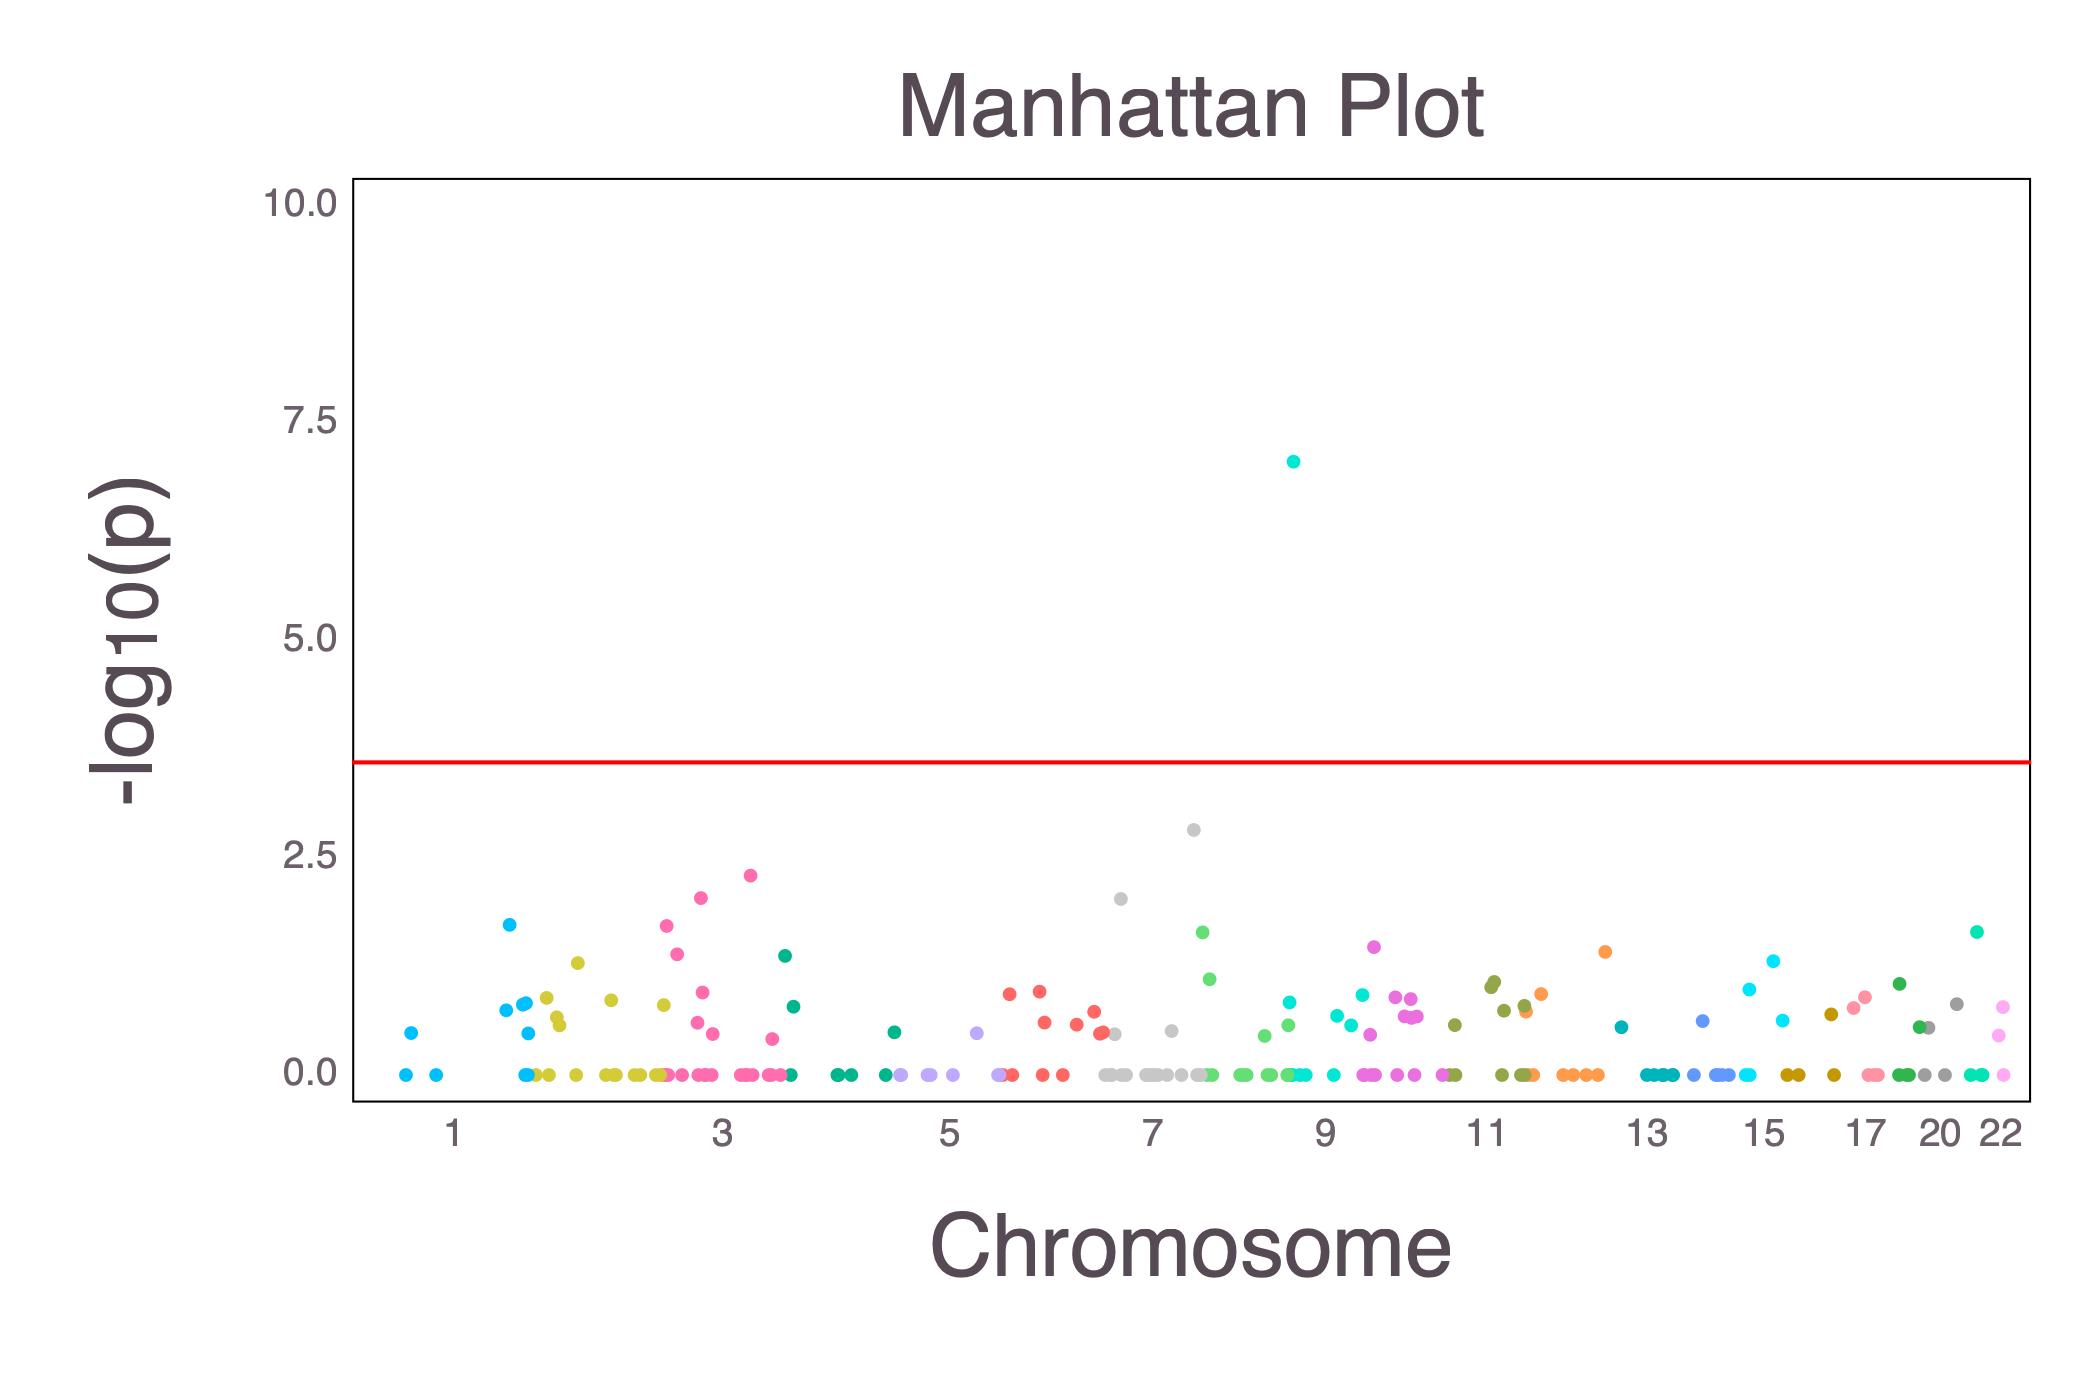

In [100]:
display("image/png", read("exactVC_eRLRT_manhattan.png"))

#### eLRT

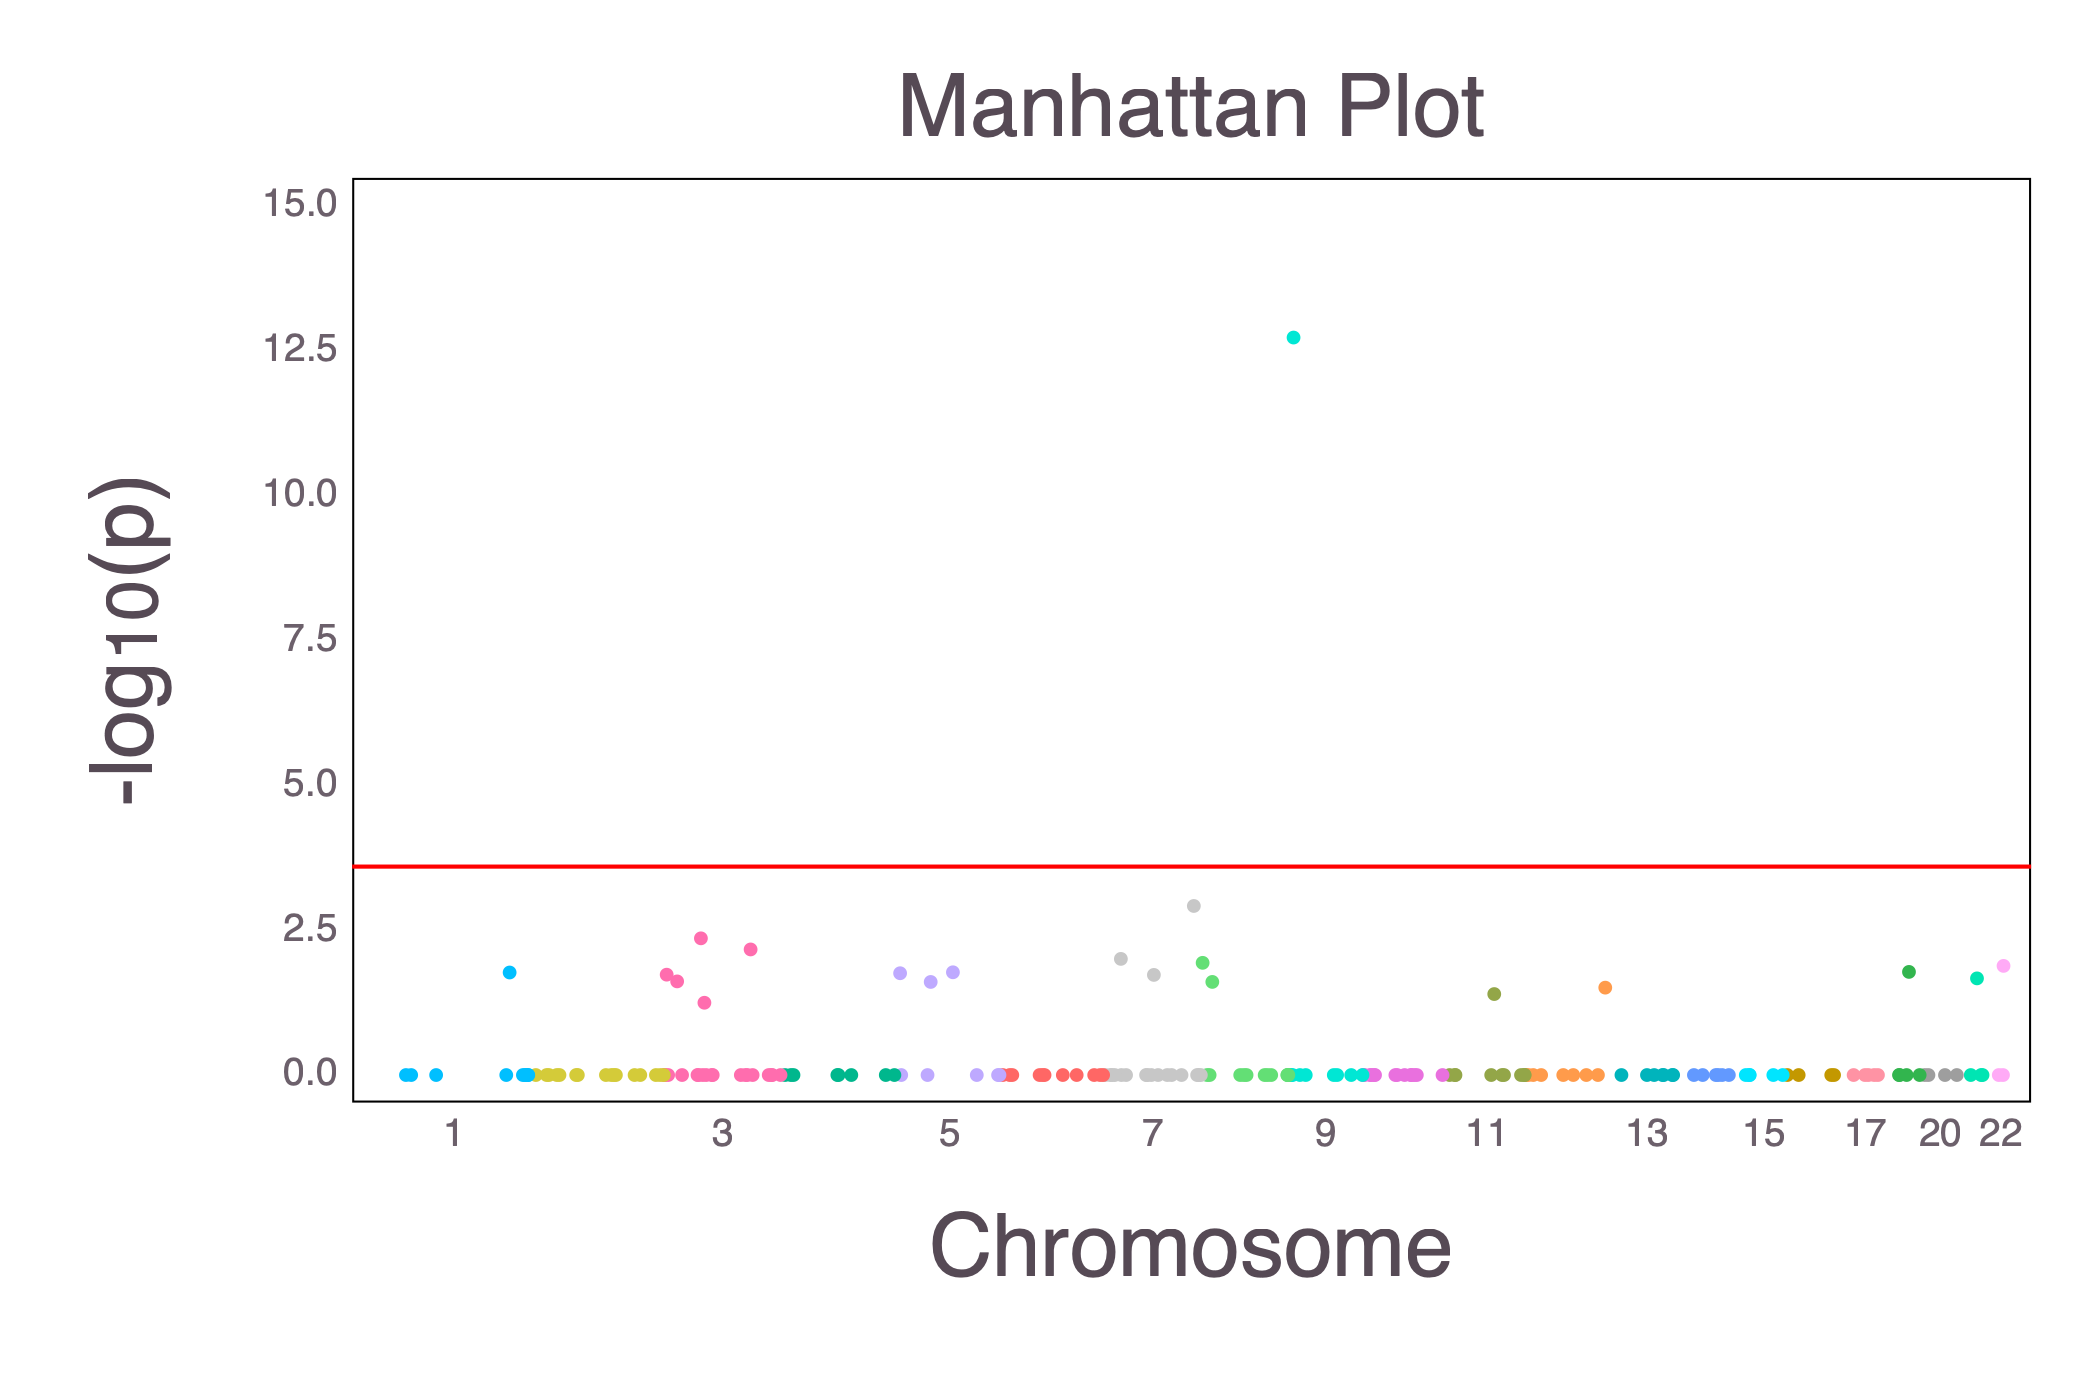

In [101]:
display("image/png", read("exactVC_eLRT_manhattan.png"))

#### eScore

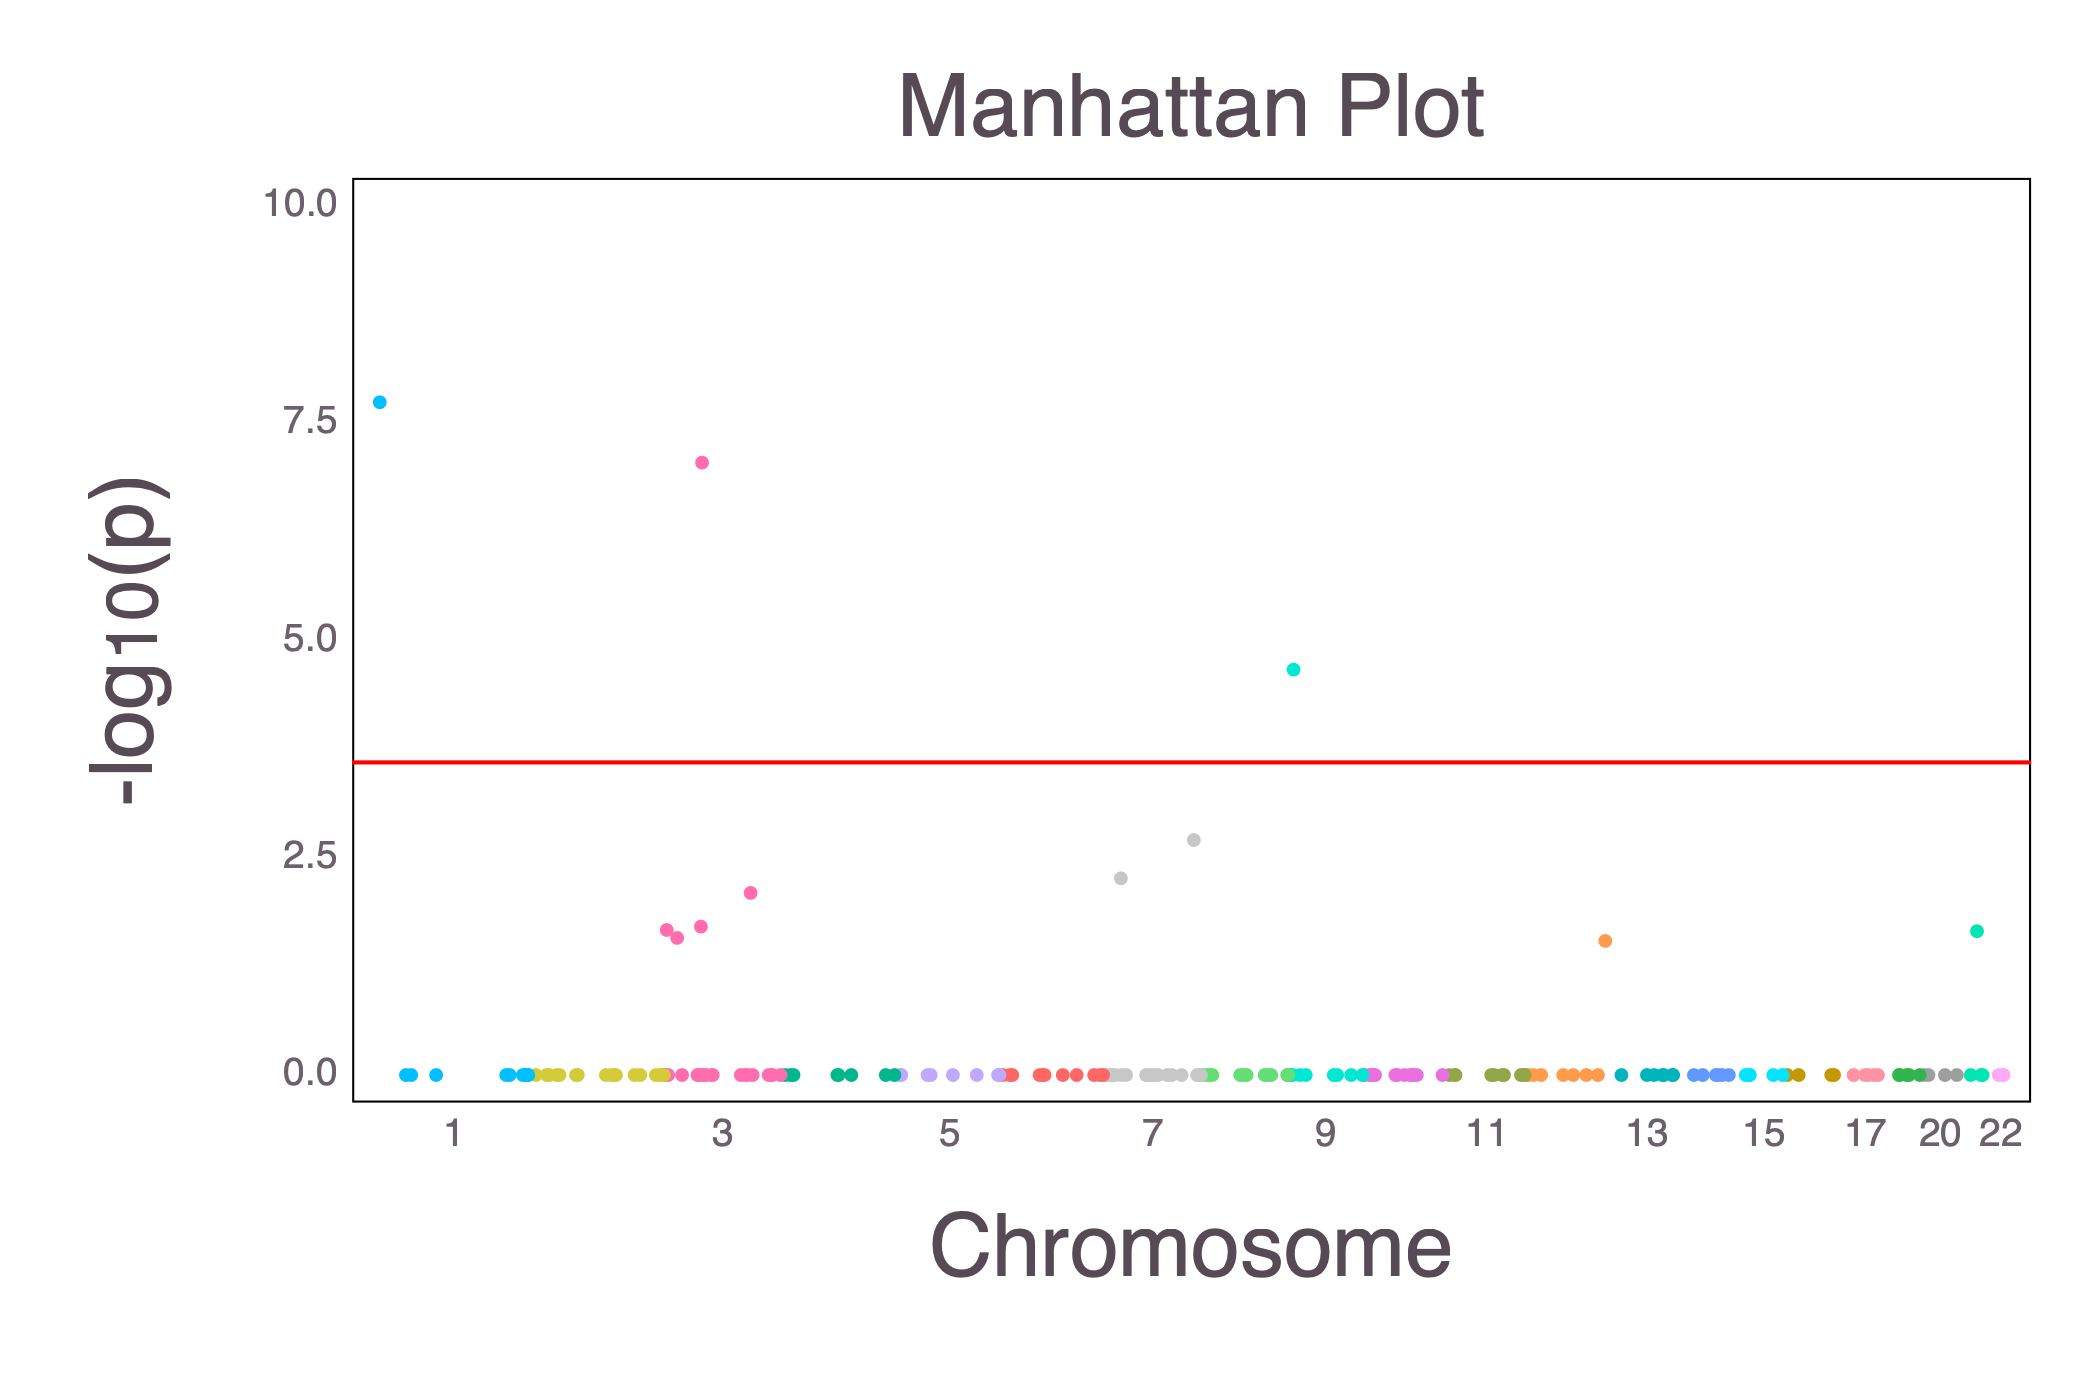

In [102]:
display("image/png", read("exactVC_eScore_manhattan.png"))